# Dow Jones Industrial Average (^DJI)

Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dow-Jones-Industrial-Average-(^DJI)" data-toc-modified-id="Dow-Jones-Industrial-Average-(^DJI)-1">Dow Jones Industrial Average (^DJI)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Describe-Data" data-toc-modified-id="Describe-Data-3.1">Describe Data</a></span></li><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.2">Sample the data</a></span></li><li><span><a href="#Number-the-columns" data-toc-modified-id="Number-the-columns-3.3">Number the columns</a></span></li></ul></li><li><span><a href="#Format-Dates" data-toc-modified-id="Format-Dates-4">Format Dates</a></span></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-5">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-6">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-7">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-8">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-Empty-Dates" data-toc-modified-id="Fill-Empty-Dates-9">Fill Empty Dates</a></span><ul class="toc-item"><li><span><a href="#Create-Empty-DataFrame" data-toc-modified-id="Create-Empty-DataFrame-9.1">Create Empty DataFrame</a></span></li><li><span><a href="#Insert-missing-values" data-toc-modified-id="Insert-missing-values-9.2">Insert missing values</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-10">Save DataFrame to CSV file</a></span></li><li><span><a href="#TODO" data-toc-modified-id="TODO-11">TODO</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-12">Averages</a></span><ul class="toc-item"><li><span><a href="#30-day-average" data-toc-modified-id="30-day-average-12.1">30-day average</a></span></li></ul></li></ul></div>

# Set Up

In [1]:
show_help = false
include("MarketIndicators.jl") 

calculate_average (generic function with 3 methods)

# Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

In [3]:
dataset_file_name = "^DJI.csv"
df = fetch_dataset(dataset_file_name, "yyyy_mm_dd")
count = size(df)[1]
println("data dimentions: ", size(df) )

data dimentions: (8989, 7)


## Describe Data

In [4]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,1985-01-29,,2020-09-25,8989,,String
2,Open,10163.8,1243.71,10094.4,29440.5,,,Float64
3,High,10226.4,1251.21,10163.4,29568.6,,,Float64
4,Low,10098.9,1235.53,10020.9,29406.8,,,Float64
5,Close,10166.3,1242.05,10094.1,29551.4,,,Float64
6,Adj Close,10166.3,1242.05,10094.1,29551.4,,,Float64
7,Volume,1.45358e8,2530000,1.1142e8,2190810000,,,Int64


## Sample the data

In [5]:
3 preview_data(df) # uncomment to see the data

LoadError: syntax: extra token "preview_data" after end of expression

## Number the columns

In [6]:
#columns = preview_data(df)
#println()

# Format Dates

In [7]:
dates = format_dates( df[:,1] , "m/d/yy")
dates[1:5]

5-element Array{String,1}:
 "1/29/85"
 "1/30/85"
 "1/31/85"
 "2/1/85"
 "2/4/85"

# Rata Die

In [8]:
insert!(df, 1, zeros(Int64, 8989), :Rata_Die)
update_rata_die!(df, 1, 2)
first(df, 6)

,Rata_Die,Date,Open,High,Low,Close,Adj Close,Volume
,Int64,String,Float64,Float64,Float64,Float64,Float64,Int64
1,724670,1985-01-29,1277.72,1295.49,1266.89,1292.62,1292.62,13560000
2,724671,1985-01-30,1297.37,1305.1,1278.93,1287.88,1287.88,16820000
3,724672,1985-01-31,1283.24,1293.4,1272.64,1286.77,1286.77,14070000
4,724673,1985-02-01,1276.94,1286.11,1269.77,1277.72,1277.72,10980000
5,724676,1985-02-04,1272.08,1294.94,1268.99,1290.08,1290.08,11630000
6,724677,1985-02-05,1294.06,1301.13,1278.6,1285.23,1285.23,13800000


In [9]:
columns = preview_data(df)
println()

13×8 DataFrame
│ Row │ Rata_Die │ Date       │ Open    │ High    │ Low     │ Close   │
│     │ Int64    │ String     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 724670   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │
│ 2   │ 725754   │ 1988-01-18 │ 1961.7  │ 1977.45 │ 1938.99 │ 1963.86 │
│ 3   │ 726835   │ 1991-01-03 │ 2611.63 │ 2622.28 │ 2567.57 │ 2573.51 │
│ 4   │ 727914   │ 1993-12-17 │ 3726.1  │ 3751.57 │ 3723.35 │ 3751.57 │
│ 5   │ 728997   │ 1996-12-04 │ 6442.0  │ 6443.07 │ 6367.41 │ 6422.94 │
│ 6   │ 730081   │ 1999-11-23 │ 11090.3 │ 11101.8 │ 10976.4 │ 10995.6 │
│ 7   │ 731172   │ 2002-11-18 │ 8579.74 │ 8636.24 │ 8480.68 │ 8486.57 │
│ 8   │ 732258   │ 2005-11-08 │ 10574.2 │ 10574.2 │ 10524.3 │ 10539.7 │
│ 9   │ 733345   │ 2008-10-30 │ 9004.66 │ 9266.47 │ 8976.87 │ 9180.69 │
│ 10  │ 734430   │ 2011-10-20 │ 11502.1 │ 11581.2 │ 11391.1 │ 11541.8 │
│ 11  │ 735520   │ 2014-10-14 │ 16321.9 │ 16463.7

# Draw Plots

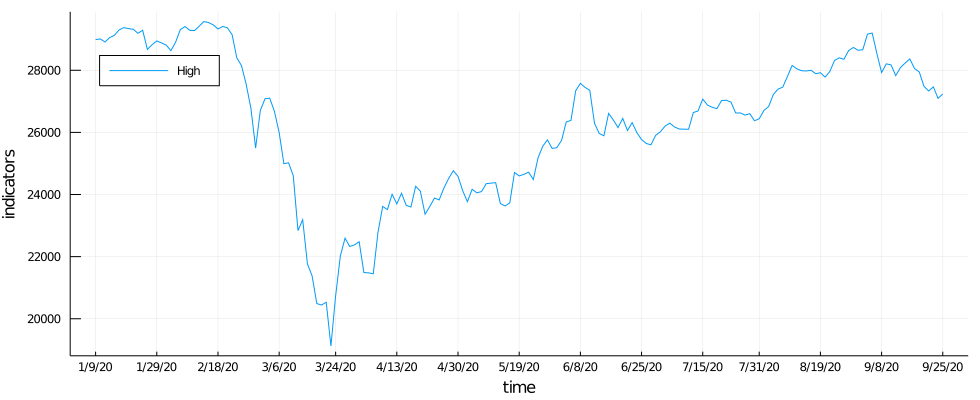

In [10]:
using Plots

rows = count-180:count
gr()
plot(          dates[rows], # x-axis: dates
               [  df[rows,4]    ], # y-axis
    label    = [  columns[4]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [11]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                High = df[:,4]
               )

columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ 1295.49 │
│ 2   │ 725754 │ 1988-01-18 │ 1977.45 │
│ 3   │ 726835 │ 1991-01-03 │ 2622.28 │
│ 4   │ 727914 │ 1993-12-17 │ 3751.57 │
│ 5   │ 728997 │ 1996-12-04 │ 6443.07 │
│ 6   │ 730081 │ 1999-11-23 │ 11101.8 │
│ 7   │ 731172 │ 2002-11-18 │ 8636.24 │
│ 8   │ 732258 │ 2005-11-08 │ 10574.2 │
│ 9   │ 733345 │ 2008-10-30 │ 9266.47 │
│ 10  │ 734430 │ 2011-10-20 │ 11581.2 │
│ 11  │ 735520 │ 2014-10-14 │ 16463.7 │
│ 12  │ 736606 │ 2017-10-04 │ 22685.9 │
│ 13  │ 737693 │ 2020-09-25 │ 27239.3 │
 Dataset dimentions: (8989, 3)

 Column numbering:
1 Day
2 Date
3 High



# Quantize (normalize) the data

In [12]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -0.044185261106501034
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 1251.209961
maximum = 29568.570313
Save these values for later to run model preditions
13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725754 │ 1988-01-18 │ -121.0  │
│ 3   │ 726835 │ 1991-01-03 │ -116.0  │
│ 4   │ 727914 │ 1993-12-17 │ -105.0  │
│ 5   │ 728997 │ 1996-12-04 │ -81.0   │
│ 6   │ 730081 │ 1999-11-23 │ -39.0   │
│ 7   │ 731172 │ 2002-11-18 │ -61.0   │
│ 8   │ 732258 │ 2005-11-08 │ -44.0   │
│ 9   │ 733345 │ 2008-10-30 │ -56.0   │
│ 10  │ 734430 │ 2011-10-20 │ -35.0   │
│ 11  │ 735520 │ 2014-10-14 │ 9.0     │
│ 12  │ 736606 │ 2017-10-04 │ 65.0    │
│ 13  │ 737693 │ 2020-09-25 │ 106.0   │
 Dataset dimentions: (8989, 3)

 Column numbering:
1 Day
2 Date
3 High



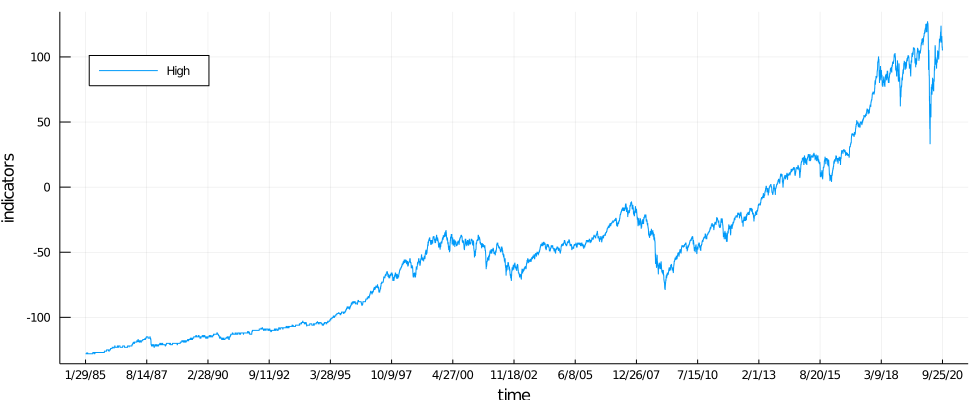

In [13]:
using Plots

dates = format_dates( df[:,2] , "m/d/yy")
println()

rows = 1:count
gr()
plot(          dates[rows], # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill Empty Dates

## Create Empty DataFrame

## Insert missing values

In [14]:
for i in 1:count-1
    day_this = df[i,1]
    day_next = df[i+1,1]
    
    value = df[i,3] # assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        date_string = Dates.format(rata2datetime(day), "yyyy-mm-dd")
        push!(df, [ day date_string value ])
    end
    
end

sort!(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725755 │ 1988-01-19 │ -121.0  │
│ 3   │ 726840 │ 1991-01-08 │ -116.0  │
│ 4   │ 727925 │ 1993-12-28 │ -105.0  │
│ 5   │ 729010 │ 1996-12-17 │ -82.0   │
│ 6   │ 730095 │ 1999-12-07 │ -38.0   │
│ 7   │ 731180 │ 2002-11-26 │ -60.0   │
│ 8   │ 732265 │ 2005-11-15 │ -43.0   │
│ 9   │ 733350 │ 2008-11-04 │ -52.0   │
│ 10  │ 734435 │ 2011-10-25 │ -32.0   │
│ 11  │ 735520 │ 2014-10-14 │ 9.0     │
│ 12  │ 736605 │ 2017-10-03 │ 65.0    │
│ 13  │ 737690 │ 2020-09-22 │ 107.0   │
 Dataset dimentions: (13024, 3)

 Column numbering:
1 Day
2 Date
3 High



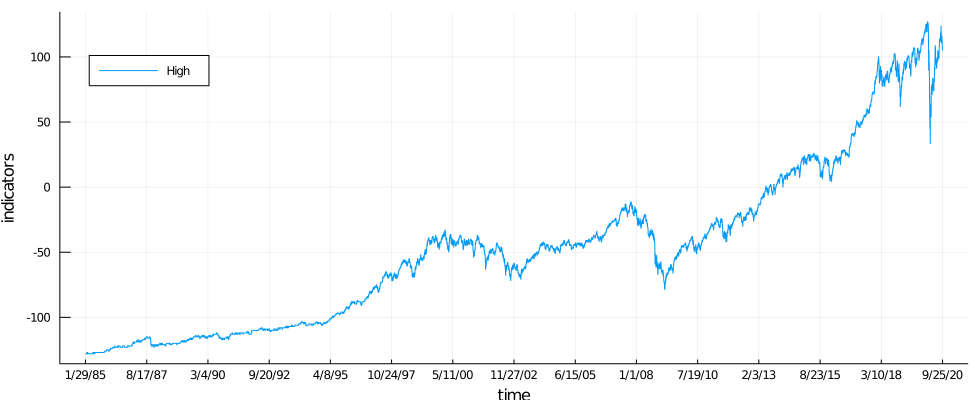

In [15]:
using Plots
count = size(df)[1]
rows = 1:count

dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [16]:
save_dataset(df, dataset_file_name);

# Averages

In [29]:

averages5    = calculate_average(df, 5, 3)
averages30   = calculate_average(df, 30, 3)
averages90   = calculate_average(df, 90, 3)
averages180  = calculate_average(df, 180, 3)
averages365  = calculate_average(df, 365, 3)
println()

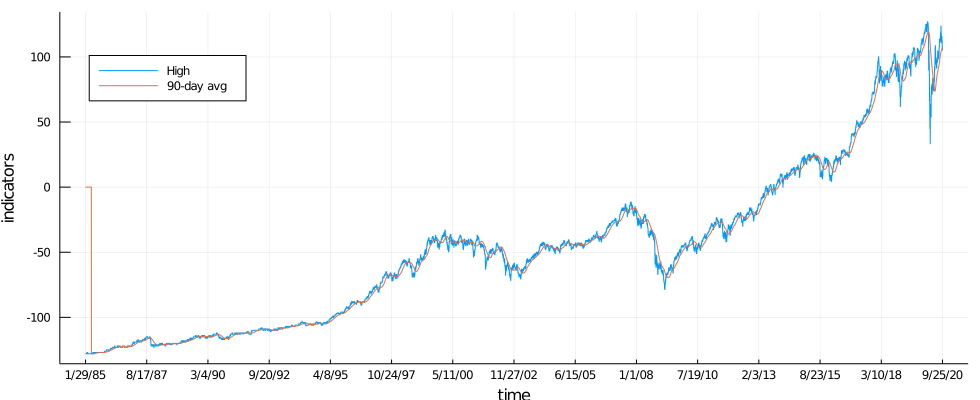

In [18]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot!(          dates, # x-axis: dates
               [  averages90    ], # y-axis
    label    = [ "90-day avg"    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

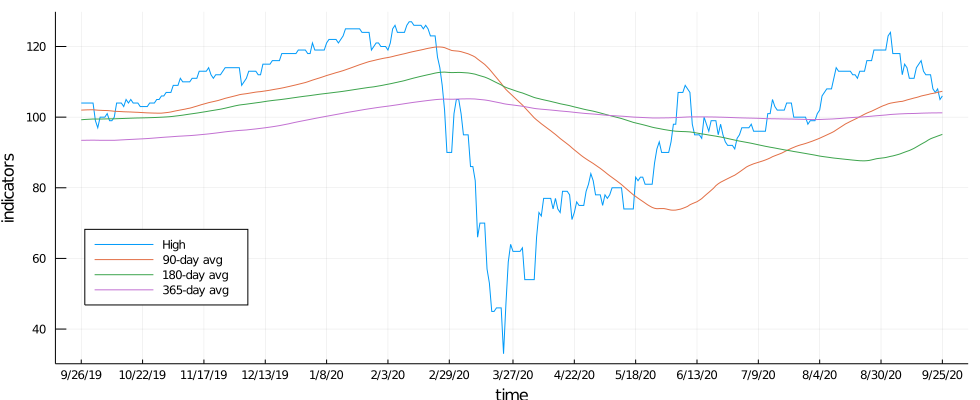

In [30]:
using Plots
count = size(df)[1]
rows = count-365:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(      dates, # x-axis: dates
        [  df[rows,3]   averages90[rows]  averages180[rows]    averages365[rows]   
        ], # y-axis
    label    = 
        [ columns[3] "90-day avg" "180-day avg" "365-day avg" ""  ],
    legend   =:bottomleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )